In [68]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

In [2]:
data = np.array([2,3,3,4,4,4,4,5,5,6])
data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

In [4]:
np.sum(data), len(data)

(40, 10)

#### 평균

In [5]:
mu = np.sum(data) / len(data)
mu

4.0

In [3]:
np.mean(data)

4.0

#### 편차

In [6]:
data - mu

array([-2., -1., -1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.])

#### 표본분산

In [9]:
sigma2 = np.sum((data - mu) ** 2) / len(data)
sigma2

1.2

In [10]:
np.var(data)

1.2

#### 불편분산

In [11]:
sigma2 = np.sum((data - mu) ** 2) / (len(data) - 1)
sigma2

1.3333333333333333

In [12]:
np.var(data, ddof=1)

1.3333333333333333

#### 표준편차

In [13]:
sigma = np.sqrt(sigma2)
sigma

1.1547005383792515

In [14]:
np.std(data, ddof=1)

1.1547005383792515

#### 통계적 그래프 이야기를 위한 import

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

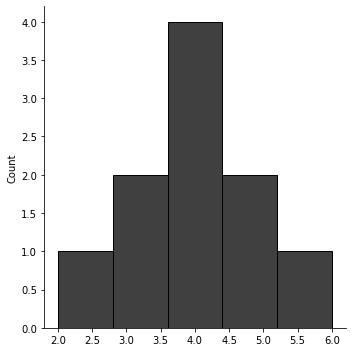

In [18]:
sns.displot(data, bins=5, color='black');

#### 밀도 추정 그래프를 포함한 히스토그램

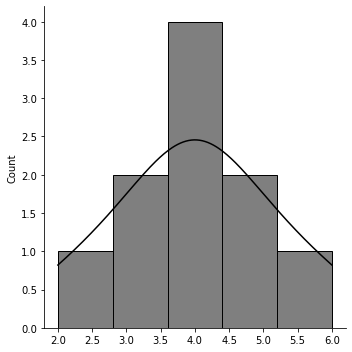

In [20]:
sns.displot(data, bins=5, color='black', kde=True);

- 히스토그램을 부드러운 선으로 이어 나가는 방법 -> 히스토그램 평활화 -> 커널 밀도추정
- 히스토그램의 전체 면적이 1로 변경

#### 2변량 데이터 하나 읽기

In [21]:
import pandas as pd

fish_multi = pd.read_csv('../data/3-3-2-fish_multi_2.csv')
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [22]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

#### 두 데이터 확보

In [24]:
length_a = fish_multi.query("species == 'A'")['length']
length_b = fish_multi.query("species == 'B'")['length']

C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length'>

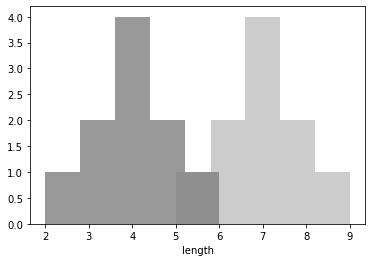

In [74]:
sns.distplot(length_a, bins=5, color='black', kde=False)
sns.distplot(length_b, bins=5, color='gray', kde=False)

#### boxplot

<AxesSubplot:xlabel='species', ylabel='length'>

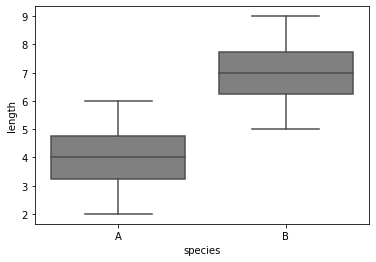

In [41]:
sns.boxplot(x='species', y='length', data=fish_multi, color='gray')

#### 바이올린 그래프

<AxesSubplot:xlabel='species', ylabel='length'>

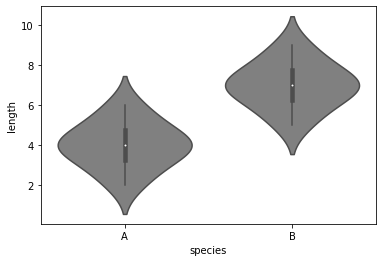

In [43]:
sns.violinplot(x='species', y='length', data=fish_multi, color='gray')

#### 다른 데이터

In [46]:
cov_data = pd.read_csv('../data/3-2-3-cov.csv')
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


#### jointplot

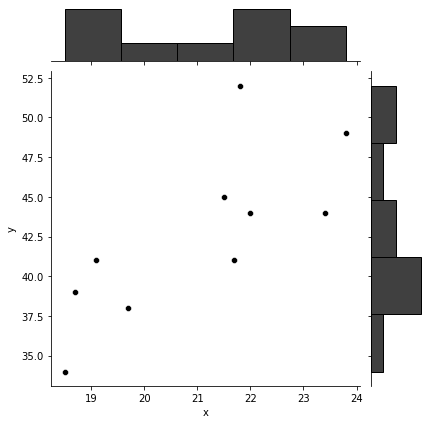

In [47]:
sns.jointplot(x='x', y='y', data=cov_data, color='black');

---

In [48]:
fish_5 = np.array([2,3,4,5,6])
fish_5

array([2, 3, 4, 5, 6])

#### 비복원추출

In [49]:
np.random.choice(fish_5, size=1, replace=False)

array([5])

In [50]:
np.random.choice(fish_5, size=3, replace=False)

array([3, 2, 6])

#### random seed 고정

In [51]:
np.random.seed(13)
np.random.choice(fish_5, size=3, replace=False)

array([3, 5, 6])

#### 비복원추출 후 평균

In [52]:
np.random.seed(13)
data = np.random.choice(fish_5, size=3, replace=False)
print(data)
np.mean(data)

[3 5 6]


4.666666666666667

#### 물고기 만마리

In [53]:
fish_100000 = pd.read_csv('../data/3-4-1-fish_length_100000.csv')['length']
fish_100000.head()

0    5.297442
1    3.505566
2    3.572546
3    3.135979
4    4.689275
Name: length, dtype: float64

#### 10개만 뽑자

In [55]:
sampling_result = np.random.choice(fish_100000, size=10, replace=False)
sampling_result

array([4.96452757, 3.13958972, 4.38522363, 5.02240608, 4.23288559,
       3.88512878, 1.5099054 , 1.88821082, 3.88315054, 3.37937641])

#### 샘플의 평균과 모집단의 평균

In [56]:
np.mean(sampling_result)

3.629040453362528

In [57]:
np.mean(fish_100000)

4.000000000000023

#### 히스토그램

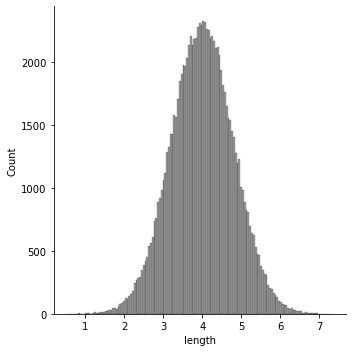

In [60]:
sns.displot(fish_100000, color='gray');

#### 우리가 가지고 있는 데이터는

In [63]:
np.mean(fish_100000)

4.000000000000023

In [64]:
np.var(fish_100000, ddof=0)

0.6400000000000087

- 평균이 4, 분산이 0.64 그리고 정규분포를 따르는 것으로 보인다.

In [66]:
x = np.arange(1, 7.1, 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

#### 평균이 4, 표준편차가 0.8인 정규분포를 따르는 난수

In [69]:
stats.norm.pdf(x=x, loc=4, scale=0.8)

array([4.40744603e-04, 6.98826903e-04, 1.09085337e-03, 1.67639859e-03,
       2.53631007e-03, 3.77782254e-03, 5.53981051e-03, 7.99765039e-03,
       1.13669531e-02, 1.59052270e-02, 2.19103756e-02, 2.97148760e-02,
       3.96745648e-02, 5.21512316e-02, 6.74887081e-02, 8.59828448e-02,
       1.07846649e-01, 1.33172835e-01, 1.61896995e-01, 1.93765332e-01,
       2.28311357e-01, 2.64845807e-01, 3.02463406e-01, 3.40068748e-01,
       3.76421790e-01, 4.10201211e-01, 4.40081658e-01, 4.64818867e-01,
       4.83335146e-01, 4.94797109e-01, 4.98677851e-01, 4.94797109e-01,
       4.83335146e-01, 4.64818867e-01, 4.40081658e-01, 4.10201211e-01,
       3.76421790e-01, 3.40068748e-01, 3.02463406e-01, 2.64845807e-01,
       2.28311357e-01, 1.93765332e-01, 1.61896995e-01, 1.33172835e-01,
       1.07846649e-01, 8.59828448e-02, 6.74887081e-02, 5.21512316e-02,
       3.96745648e-02, 2.97148760e-02, 2.19103756e-02, 1.59052270e-02,
       1.13669531e-02, 7.99765039e-03, 5.53981051e-03, 3.77782254e-03,
      

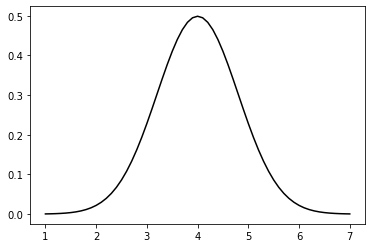

In [71]:
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color='black');

#### 물고기 데이터는 정규분포를 따른다는 것을 알 수 있다.

C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


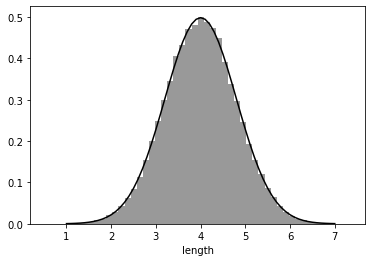

In [73]:
sns.distplot(fish_100000, color='black', kde=False, norm_hist=True)
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color='black');